# CodeClause Gender and Age Detection System

### 1. Importing the Data

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2

In [6]:
path = r"C:\Users\Alok Sharma\Downloads\archive (1)\UTKFace"
files = os.listdir(path)
size = len(files)
print(size)
files[0]


images = []
ages = []
genders = []

# Load the image
for file in files:

  image_path = os.path.join(path, file)
  image = Image.open(image_path)

  # Check if the image was successfully loaded
  if image is not None:
    image = image.resize((64, 64))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]))
    
    # Display the image
  else:
      print('Failed to load the image.')

23708


In [7]:
files[1]

'100_0_0_20170112215240346.jpg.chip.jpg'

In [8]:
len(images)

23708

In [9]:
import matplotlib.pyplot as plt

In [10]:
len(images)

23708

Gender:  1 Age:  25


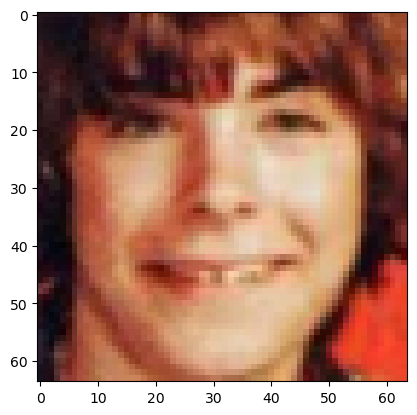

In [11]:
def des_imag(image):
  image_array = np.array(image)

  plt.imshow(image_array)
  plt.show()

idx = 5333
sample = images[idx]

print("Gender: " ,genders[idx], "Age: ", ages[idx])
des_imag(sample)

23708

In [12]:
def age_catego(age):
  if age>0 and age < 18:
    return 1

  elif age < 30:
    return 2

  elif age<60:
    return 3

  elif age <80:
    return 4

  else:
    return 5

In [13]:
target = np.zeros((size, 2), dtype = 'float32')
feature = np.zeros((size, 64, 64,3), dtype = 'uint8')

for i in range(size):
    target[i, 0] = age_catego(int(ages[i])) / 4
    target[i, 1] = int(genders[i])
    feature[i] = images[i]

feature = feature.astype('float32') / 255.0

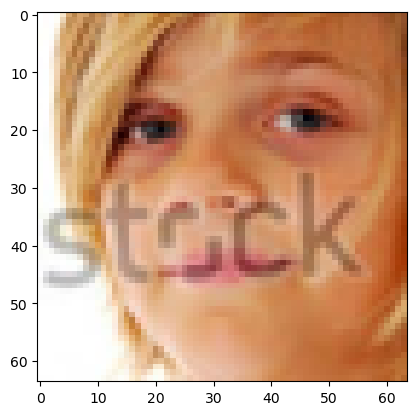

In [14]:
des_imag(feature[55])

### Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.21, shuffle = True)

In [16]:
X_train.shape

(18729, 64, 64, 3)

In [17]:
X_test.shape

(4979, 64, 64, 3)

In [18]:
Y_train.shape, X_train.shape

((18729, 2), (18729, 64, 64, 3))

In [19]:
X_train.shape

(18729, 64, 64, 3)

### Applying Algorithms

In [20]:
from keras.models import *
from keras.layers import *
from keras import backend as k

In [21]:
inputs = Input(shape = (64, 64, 3))
conv1 = Conv2D(32, kernel_size = (3, 3), activation = 'relu')(inputs)
conv2 = Conv2D(64, kernel_size = (3, 3),activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2, 2))(conv2)
conv3 = Conv2D(128, kernel_size = (3, 3),activation = 'relu')(pool1)
pool2 = MaxPooling2D(pool_size = (2, 2))(conv3)

x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation = 'relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation = 'relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation = 'relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation = 'relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation = 'relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation = 'relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation = 'relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation = 'relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation = 'relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation = 'sigmoid')(gender_model)

In [22]:
model = Model(inputs = inputs, outputs = [age_model, gender_model])
model.compile(optimizer = 'adam', loss = ['mse', 'binary_crossentropy'], metrics = ['accuracy'])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 60, 60, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 30, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

In [26]:
history = model.fit(X_train, [Y_train[:, 0],Y_train[:, 1]], validation_data = (X_test, [Y_test[:, 0], Y_test[:, 1]]), epochs = 25, batch_size = 128)

Epoch 1/25
147/147 [==============================] - 226s 2s/step - loss: 0.4472 - dense_3_loss: 0.0407 - dense_9_loss: 0.4066 - dense_3_accuracy: 0.0816 - dense_9_accuracy: 0.8424 - val_loss: 0.3842 - val_dense_3_loss: 0.0320 - val_dense_9_loss: 0.3522 - val_dense_3_accuracy: 0.0815 - val_dense_9_accuracy: 0.8634
Epoch 2/25
147/147 [==============================] - 226s 2s/step - loss: 0.4232 - dense_3_loss: 0.0371 - dense_9_loss: 0.3861 - dense_3_accuracy: 0.0829 - dense_9_accuracy: 0.8507 - val_loss: 0.3752 - val_dense_3_loss: 0.0298 - val_dense_9_loss: 0.3453 - val_dense_3_accuracy: 0.0829 - val_dense_9_accuracy: 0.8672
Epoch 3/25
147/147 [==============================] - 248s 2s/step - loss: 0.4134 - dense_3_loss: 0.0361 - dense_9_loss: 0.3773 - dense_3_accuracy: 0.0832 - dense_9_accuracy: 0.8546 - val_loss: 0.3147 - val_dense_3_loss: 0.0271 - val_dense_9_loss: 0.2876 - val_dense_3_accuracy: 0.0821 - val_dense_9_accuracy: 0.8952
Epoch 4/25
147/147 [=============================

In [27]:
len(images)

23708

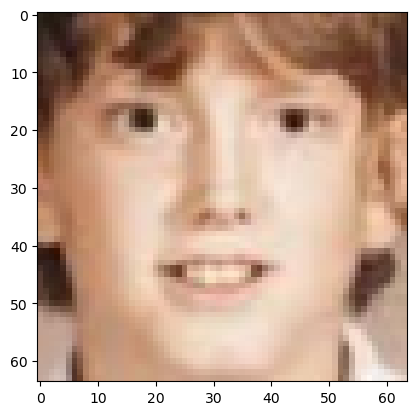

Actual Gender:  Male Age:  14
1/1 [==============================] - 1s 670ms/step
Values:  [array([[0.45431814]], dtype=float32), array([[0.04719644]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  19-30


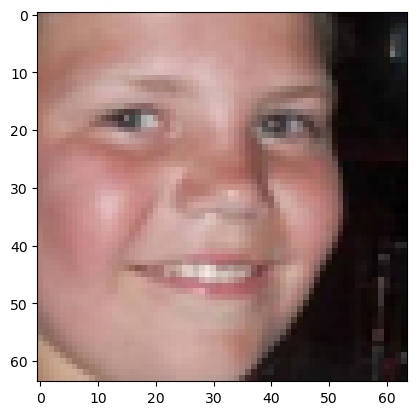

Actual Gender:  Male Age:  10
1/1 [==============================] - 0s 30ms/step
Values:  [array([[0.48154435]], dtype=float32), array([[0.16724278]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  19-30


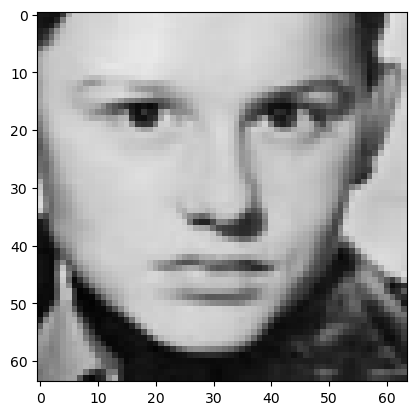

Actual Gender:  Male Age:  10
1/1 [==============================] - 0s 38ms/step
Values:  [array([[0.45493075]], dtype=float32), array([[0.04719644]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  19-30


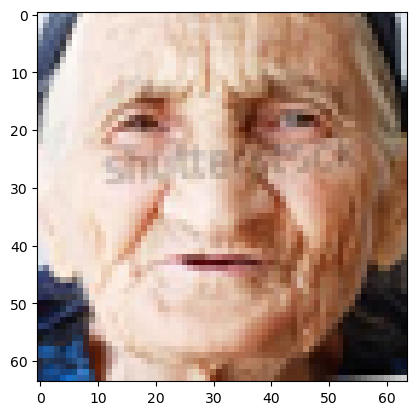

Actual Gender:  Female Age:  100
1/1 [==============================] - 0s 39ms/step
Values:  [array([[0.8505919]], dtype=float32), array([[0.06500708]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  Unknown


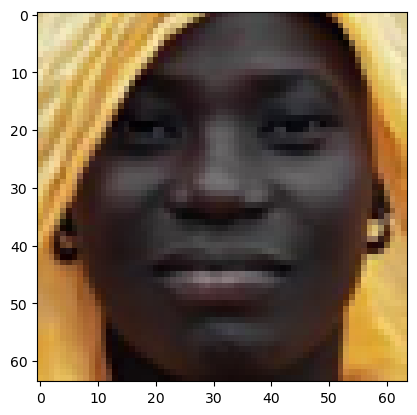

Actual Gender:  Female Age:  24
1/1 [==============================] - 0s 30ms/step
Values:  [array([[0.57417125]], dtype=float32), array([[0.9798569]], dtype=float32)] 
Predicted Gender:  Female Predicted Age:  19-30


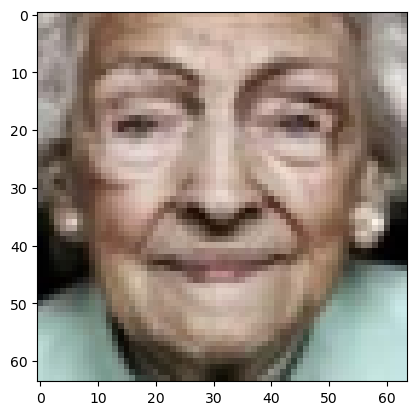

Actual Gender:  Female Age:  100
1/1 [==============================] - 0s 28ms/step
Values:  [array([[0.85825145]], dtype=float32), array([[0.69157517]], dtype=float32)] 
Predicted Gender:  Female Predicted Age:  Unknown


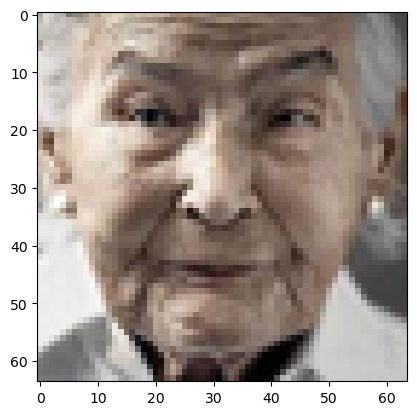

Actual Gender:  Female Age:  100
1/1 [==============================] - 0s 28ms/step
Values:  [array([[0.8124201]], dtype=float32), array([[0.04719644]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  31-80


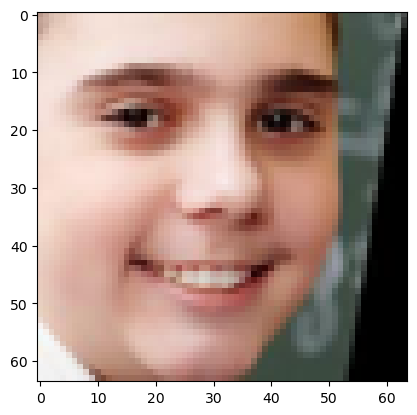

Actual Gender:  Male Age:  12
1/1 [==============================] - 0s 43ms/step
Values:  [array([[0.43544668]], dtype=float32), array([[0.04719644]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  19-30


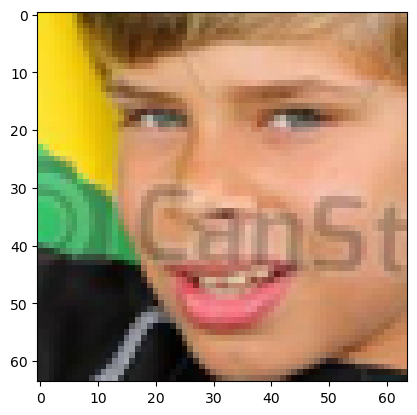

Actual Gender:  Male Age:  10
1/1 [==============================] - 0s 31ms/step
Values:  [array([[0.4308122]], dtype=float32), array([[0.04719644]], dtype=float32)] 
Predicted Gender:  Male Predicted Age:  19-30


In [28]:
def display(img):
    img_rgb = img.convert("RGB")

    # Convert the RGB image to a NumPy array
    img_array = np.array(img_rgb)

    # Display the RGB image
    plt.imshow(img_array)
    plt.show()
def age_group(age):
    if age >=0 and age < 18:
        return 1
    
    elif age < 30:
        return 2
    
    elif age < 80:
        return 3
    
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"

def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
     sample_array = np.asarray(sample) / 255.0
     val = model.predict( np.array([ sample_array ]) )
     age = get_age(val[0])
     gender = get_gender(val[1])
     print("Values: ", val, "\nPredicted Gender: ", gender, "Predicted Age: ", age)


indexes = [500, 59, 80, 2, 4546, 7, 9, 256, 45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender: ", get_gender(genders[idx]), "Age: ", ages[idx])
    res = get_result(sample)

In [30]:
len(images)

23708

In [31]:
def display(img):
    img_rgb = img.convert("RGB")

    # Convert the RGB image to a NumPy array
    img_array = np.array(img_rgb)

    # Display the RGB image
    plt.imshow(img_array)
    plt.show()
def age_group(age):
    if age >=0 and age < 18:
        return 1
    
    elif age < 30:
        return 2
    
    elif age < 80:
        return 3
    
    else:
        return 4

In [32]:
def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"

In [33]:
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
     sample_array = np.asarray(sample) / 255.0
     val = model.predict( np.array([ sample_array ]) )
     age = get_age(val[0])
     gender = get_gender(val[1])


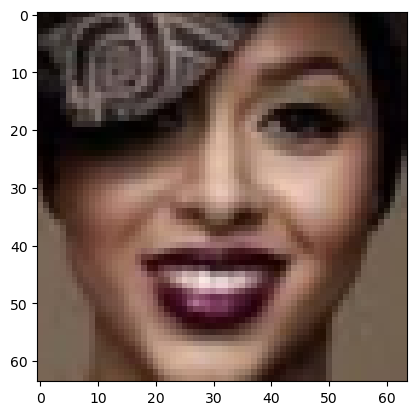

Actual Gender:  Female Age:  22
1/1 [==============================] - 0s 31ms/step


TypeError: 'NoneType' object is not subscriptable

In [34]:
idx = 3465
sample = images[idx]
display(sample)
print("Actual Gender: ", get_gender(genders[idx]), "Age: ", ages[idx])
res = get_result(sample)
print("Predicted Gender: ", res[1], "Predicted Age: ", res[0])

In [35]:
model.save('AGE_GENDER.h5')

In [36]:
from keras.models import load_model
model = load_model('AGE_GENDER.h5')

In [37]:
def preprocess_image(image_path):

    image = Image.open(image_path)
    image = image.resize((64, 64))
    image_array = np.array(image)
    preprocessed_image = np.expand_dims(image_array, axis = 0)

    preprocessed_image = preprocessed_image.astype('float32') / 255.0

    return preprocessed_image

In [38]:
def get_result(sample):
     sample_array = np.asarray(sample) / 255.0
     val = model.predict(preprocessed_image)
     age = get_age(val[0])
     gender = get_gender(val[1])

In [53]:
preprocess_image(r'C:\Users\Alok Sharma\Downloads\archive (1)\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg')

array([[[[0.19215687, 0.15294118, 0.11372549],
         [0.17254902, 0.13333334, 0.09803922],
         [0.16470589, 0.1254902 , 0.09019608],
         ...,
         [0.34117648, 0.3137255 , 0.26666668],
         [0.3529412 , 0.32941177, 0.28235295],
         [0.32941177, 0.3019608 , 0.2627451 ]],

        [[0.17254902, 0.13333334, 0.10588235],
         [0.16078432, 0.12156863, 0.09019608],
         [0.15686275, 0.11764706, 0.09019608],
         ...,
         [0.31764707, 0.28235295, 0.24313726],
         [0.34117648, 0.3137255 , 0.26666668],
         [0.34117648, 0.30980393, 0.27058825]],

        [[0.15294118, 0.12156863, 0.09803922],
         [0.14509805, 0.10980392, 0.08627451],
         [0.14117648, 0.10980392, 0.08235294],
         ...,
         [0.29411766, 0.25490198, 0.21568628],
         [0.32156864, 0.28627452, 0.24705882],
         [0.32941177, 0.29411766, 0.25882354]],

        ...,

        [[0.28627452, 0.2784314 , 0.23137255],
         [0.23921569, 0.23137255, 0.1882353 ]

In [54]:
def test_age_gender_image(image_path):
  preprocessed_image = preprocess_image(image_path)

  age_pred, gender_pred  = model.predict(preprocessed_image)
  age_label = get_age(age_pred)
  gender_label = get_gender(gender_pred)

  return age_label, gender_label

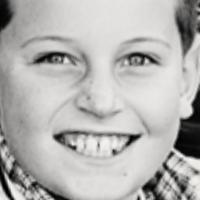

In [55]:
Image.open(r'C:\Users\Alok Sharma\Downloads\archive (1)\UTKFace/10_0_0_20170110220447314.jpg.chip.jpg')

In [56]:
image_path = r'C:\Users\Alok Sharma\Downloads\archive (1)\UTKFace/10_0_0_20170110220447314.jpg.chip.jpg'

age_prediction, gender_prediction = test_age_gender_image(image_path)
print('Age_prediction:', age_prediction)
print('Gender_prediction:', gender_prediction)

1/1 [==============================] - 0s 31ms/step
Age_prediction: 19-30
Gender_prediction: Male
